### Project : US Baby Names Analysis
### Created by : Santosh Selvaraj
### Date : 14th Feb'2019  


#### Data Loading and Preprocessing
In the below section, I am importing all the necessary libraries, loading the dataset, preprocessing it to make one exhaustive dataset.   
Also understanding the dataset, metadata and performing basic quality checks.

In [2]:
#importing necessary libraries
import os
#Assigning working directory
wdDir = "C:\\Users\\Santosh Selvaraj\\Documents\\Working Directory\\Data Science Projects\\BabyNames"
#Setting path to working directory
os.chdir(wdDir)
#Importing other required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import chi2_contingency

In [3]:
#Creating a list of text files
txtlist = []
for file in os.listdir(wdDir):
    if file.endswith(".TXT"):
        txtlist.append(file)
print(txtlist)

['AK.TXT', 'AL.TXT', 'AR.TXT', 'AZ.TXT', 'CA.TXT', 'CO.TXT', 'CT.TXT', 'DC.TXT', 'DE.TXT', 'FL.TXT', 'GA.TXT', 'HI.TXT', 'IA.TXT', 'ID.TXT', 'IL.TXT', 'IN.TXT', 'KS.TXT', 'KY.TXT', 'LA.TXT', 'MA.TXT', 'MD.TXT', 'ME.TXT', 'MI.TXT', 'MN.TXT', 'MO.TXT', 'MS.TXT', 'MT.TXT', 'NC.TXT', 'ND.TXT', 'NE.TXT', 'NH.TXT', 'NJ.TXT', 'NM.TXT', 'NV.TXT', 'NY.TXT', 'OH.TXT', 'OK.TXT', 'OR.TXT', 'PA.TXT', 'RI.TXT', 'SC.TXT', 'SD.TXT', 'TN.TXT', 'TX.TXT', 'UT.TXT', 'VA.TXT', 'VT.TXT', 'WA.TXT', 'WI.TXT', 'WV.TXT', 'WY.TXT']


In [4]:
#Creating a dataframe with all text files appended
data = pd.DataFrame()
for file in txtlist:
    data = data.append(pd.read_csv(file,header=None))
#Adding column names to the dataset
data.columns = ["state","gender","birth_year","name","count"]

In [5]:
#Ensuring data import was done correctly
data.head() #Expecting high count values for state AK

,state,gender,birth_year,name,count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [6]:
data.tail() #Expecting low count values for state WY

,state,gender,birth_year,name,count
27769,WY,M,2017,Nathan,5
27770,WY,M,2017,Rayden,5
27771,WY,M,2017,Sterling,5
27772,WY,M,2017,Timothy,5
27773,WY,M,2017,Zander,5


In [10]:
#Checking for Nan values in the dataset and understanding datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5933561 entries, 0 to 27773
Data columns (total 5 columns):
state         object
gender        object
birth_year    int64
name          object
count         int64
dtypes: int64(2), object(3)
memory usage: 271.6+ MB


In [8]:
#Understanding and summarizing the dataset
data.describe().astype(np.int64) #Data is from 1910 to 2017, with min count of 5 and max count ~ 10K

,birth_year,count
count,5933561,5933561
mean,1974,51
std,30,177
min,1910,5
25%,1951,7
50%,1979,13
75%,2001,33
max,2017,10020


### Excercise 1

### Analyzing the unisex baby names : "Jessie" and "Riley" and identifying whether either of them is significantly more associated with a particular gender than the other   

Performing a Chi Square test to analyze the relationship between the two categorical variables ''baby names(Jessie/Riley)" and "Gender(Male/Female)"



In [10]:
#Preparing the dataset with only 'Jessie' and 'Riley' records
data1 = data[(data["name"] == "Jessie") | (data["name"] == "Riley")]
#data1["count"].sum() #Before group by: 417025

data1 = data1.groupby(["gender","name"], as_index = False).agg({"count":"sum"})
#data1["count"].sum() #After group by: 417025

Visualizing the distribution of baby name("Jessie" and "Riley") frequencies across Gender using a comparison bar graph

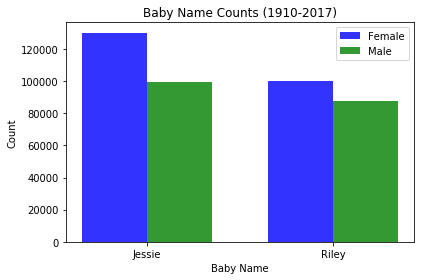

In [11]:
# Visualizing the distribution of counts across Jessie and Riley
n_groups = 2
female_count = data1[data1["gender"] == "F"]["count"].values
male_count = data1[data1["gender"] == "M"]["count"].values
 
# Plotting the distributions using matplotlib 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
bar1 = plt.bar(index, female_count, bar_width, alpha=opacity, color='b', label='Female')
bar2 = plt.bar(index + bar_width, male_count, bar_width, alpha=opacity, color='g', label='Male')
 
plt.xlabel('Baby Name')
plt.ylabel('Count')
plt.title('Baby Name Counts (1910-2017)')
plt.xticks(index + 0.5*bar_width, ('Jessie', 'Riley'))
plt.legend()
plt.tight_layout()
plt.show()

Performing the Chi Sqaure test

In [14]:
#Chisquare test
#Null Hypothesis: Baby names Jessie and Riley do not show association with any particular gender
#A chi-square goodness of fit test allows us to test whether the observed proportions for a categorical variable differ from 
#hypothesized proportions.
crosstab = pd.crosstab(data1["name"],data1["gender"],values=data1["count"],aggfunc=sum,margins=None)
stat, p, dof, expected = chi2_contingency(crosstab)
print("ChiSquare Test Results:\nChiSquare Statistic: %d\nP-Value: %f" % (stat,p))
#Low p-value suggests that the  observed frequencies are significantly different from expected marginal frequencies

ChiSquare Test Results:
ChiSquare Statistic: 507
P-Value: 0.000000


Chi Sqaure test results show a low p value, almost 0, indicating significant difference between the expected and observed values. We hence reject the null hypothesis that there is no association between the names and gender, and accept the alternate hypothesis that there is a significant association between the two.

Now that we know there is a significant association between the two, we can look at the individual chi sqaure statistic to understand if either of the names(Jessie/Riley) show a higher association with gender(male/female)

In [15]:
crosstab = crosstab.values
jessie_f = (crosstab[0,0]-expected[0,0])**2/expected[0,0]
jessie_m = (crosstab[0,1]-expected[0,1])**2/expected[0,1]
riley_f = (crosstab[1,0]-expected[1,0])**2/expected[1,0]
riley_m = (crosstab[1,1]-expected[1,1])**2/expected[1,1]
print("Individual ChiSquare Statistic:\nJessie Female: %d\nJessie Male: %d\nRiley Female: %d\nRiley Male: %d" %(jessie_f,jessie_m,riley_f,riley_m))

Individual ChiSquare Statistic:
Jessie Female: 102
Jessie Male: 126
Riley Female: 125
Riley Male: 154


The individual statistic values above indicates that the name 'Riley' associates more strongly with both genders as compared to the name 'Jessie'. as the statistic values are higher for Riley.

### Excercise 2

### Identifying the 5 most common female and 5 most common male names from 1900-2000 and visualizing their frequency trend over time 

In [15]:
#Excercise 2
#Filter for year between 1900 and 2000 (Data starts at 1910)
data2 = data[(data["birth_year"]>=1900) & (data["birth_year"]<=2000)]
#Aggregate the counts across filtered years
common_names = data2.groupby(["gender","name"], as_index = False).agg({"count":"sum"})
#Sort counts in descending order
common_names = common_names.sort_values(by=["gender","count"], ascending = False)
#Get the top 5 names for each gender
common_names = common_names.groupby("gender").head(5).reset_index(drop=True)
#Get the 10 common names
common_names = common_names[["name","gender"]]
#Filter data to get only for the common names
data2 = pd.merge(data2,common_names,on=["name","gender"],how="inner")
#Grouping data to remove state column
data2 = data2.groupby(["birth_year","name"],as_index=False).agg({"count":"sum"})

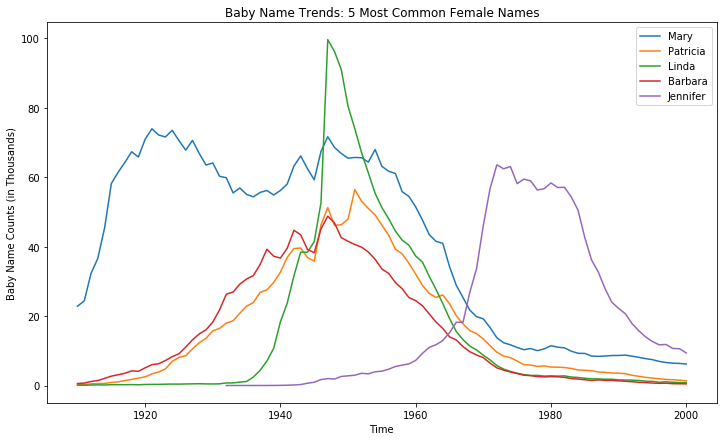

In [17]:
#Female Common Names
fig, ax = plt.subplots()
fig.set_size_inches(12,7)
for name in list(common_names[common_names["gender"]=="F"]["name"].values):
    plt.plot(data2[data2["name"]==name]["birth_year"],data2[data2["name"]==name]["count"]/1000, label = name)
plt.legend(loc = 1)
plt.xlabel("Time")
plt.ylabel("Baby Name Counts (in Thousands)")
plt.title("Baby Name Trends: 5 Most Common Female Names")
plt.show()

Findings and Insights:  
-  We observe that although these are the most popular female names overall, the trends show a diminishing popularity around the end of 20th century. 
- Also the popularity of names such as 'Linda', 'Barbara' and 'Patricia' peaked around the 1950s and eventually reduced over time
- Other names such as 'Jennifer' picked up popularity only towards the end of the 20th century and was uncommon during the earlier days


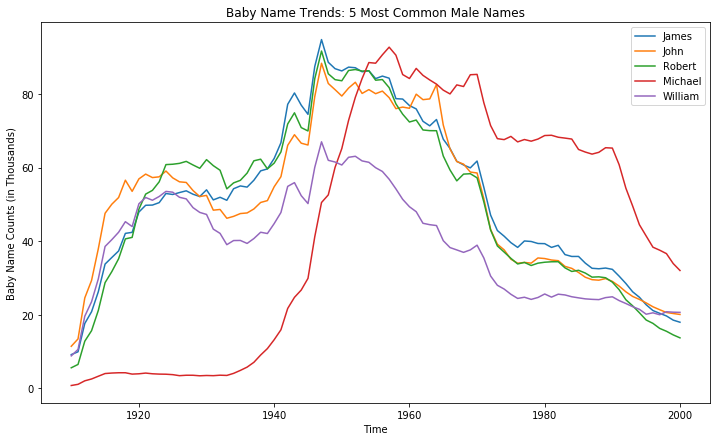

In [18]:
#Male Common Names
fig, ax = plt.subplots()
fig.set_size_inches(12,7)
for name in list(common_names[common_names["gender"]=="M"]["name"].values):
    plt.plot(data2[data2["name"]==name]["birth_year"],data2[data2["name"]==name]["count"]/1000, label = name)
plt.legend(loc = 1)
plt.xlabel("Time")
plt.ylabel("Baby Name Counts (in Thousands)")
plt.title("Baby Name Trends: 5 Most Common Male Names")
plt.show()

Findings and Insights:  
-  We observe a similar trend for all the popular names, with an increased popularity during the 1950s, much like some of the popular female names
- Although the popularity has dropped over time, the decline is not as sharp as the popular female names 
- The name'Michael' picked up popularity only towards the 1940s and remained the most popular one amongst these names

### Excercise 3

### Additional Analysis

#### Diversity of names increases over time probably due to exposure, influences from different nations/cultures, education etc.

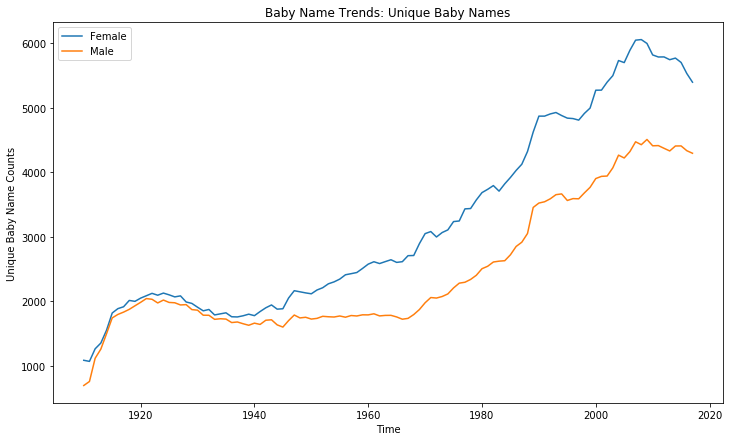

In [20]:
#Unique baby names
data4 = data.groupby(["birth_year","gender"], as_index = False).agg({"name":"nunique"})

fig, ax = plt.subplots()
fig.set_size_inches(12,7)
plt.plot(data4[data4["gender"]=="F"]["birth_year"],data4[data4["gender"]=="F"]["name"], label = "Female")
plt.plot(data4[data4["gender"]=="M"]["birth_year"],data4[data4["gender"]=="M"]["name"], label = "Male")
plt.legend(loc = 2)
plt.xlabel("Time")
plt.ylabel("Unique Baby Name Counts")
plt.title("Baby Name Trends: Unique Baby Names")
plt.show()

Findings :  
We observe a steep rise in the number of unique baby names for both male and female over time, indicating diversified choices of names


#### Analyzing the popularity of baby names based on the alphabets they begin with, and their trends over time

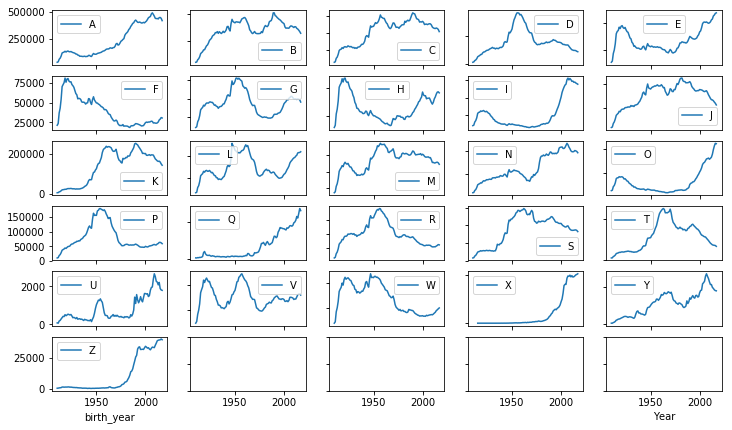

In [25]:
#Baby Names based on alphabets
data5 = data.groupby(["birth_year","name"], as_index = False).agg({"count":"sum"})
data5["start_letter"] = data5["name"].str.slice(stop=1)
data5 = data5.groupby(["birth_year","start_letter"], as_index = False).agg({"count":"sum"})

#Plot
sorted_start_letters = sorted(data5["start_letter"].unique())
fig, axes = plt.subplots(nrows=6, ncols=5, sharex = True)
fig.set_size_inches(12,7)
x = 0
for letter in sorted_start_letters:
    m = x//5
    n = x%5
    data5[data5['start_letter']==letter].plot(x="birth_year",y="count",sharey = True,ax=axes[m, n],legend=True,label=letter)
    x+=1
plt.xlabel("Year")
plt.ylabel("Name Counts")
plt.show()

Findings:  
- We observe that names starting with 'E','O','Q' are increasing greatly in popularity
- The more uncommon alphabets such as 'X','Y','Z','U' are surfacing more frequently iver time as compared to the early 1900s

#### Analyzing the length of baby names to identify bias in selection of names

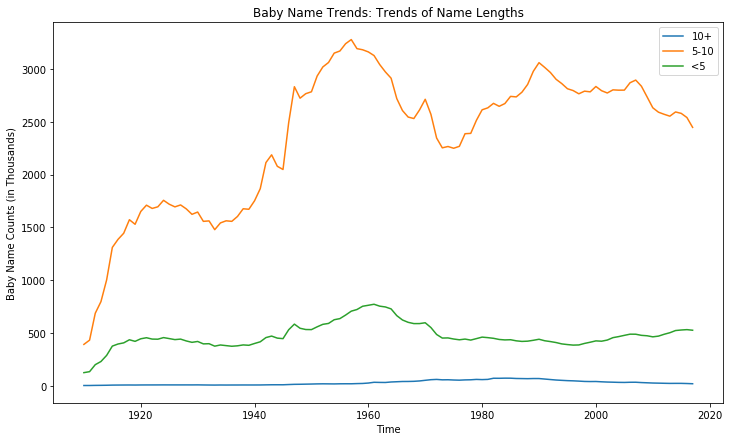

In [19]:
#Finding any trends in the length of the name
data3 = data.groupby(["birth_year","name"], as_index = False).agg({"count":"sum"})
data3["name_length"] = [len(x) for x in data3["name"].values]
data3 = data3.groupby(["birth_year","name_length"], as_index = False).agg({"count":"sum"})
#Create custom groups
data3.loc[data3['name_length']<5, 'length_groups'] = "<5"
data3.loc[(data3['name_length']>=5) & (data3['name_length']<10), 'length_groups'] = "5-10"
data3.loc[data3['name_length']>=10, 'length_groups'] = "10+"
data3 = data3.groupby(["birth_year","length_groups"], as_index = False).agg({"count":"sum"})
#Plot name lengths across year
fig, ax = plt.subplots()
fig.set_size_inches(12,7)
for i in list(data3["length_groups"].unique()):
    plt.plot(data3[data3["length_groups"]==i]["birth_year"],data3[data3["length_groups"]==i]["count"]/1000, label = i)
plt.legend(loc = 1)
plt.xlabel("Time")
plt.ylabel("Baby Name Counts (in Thousands)")
plt.title("Baby Name Trends: Trends of Name Lengths")
plt.show()

Findings :  
 - We observe that baby names that have length between 5-10 letters are the most popular choices and remain popular throughout this time period
 - Also note that the baby names with length greater than 10 letters are not preferred and see a continuing trend of low popularity throughout the time period, as expected, indicating people's inclination towards shorter names over long ones 
